<a href="https://colab.research.google.com/github/Virendra513/Deep-Learning-DL-/blob/main/Image_Classification_CNN_Binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bianry Image Classification using CNN(Convolutional Neural Network)**
---

☯


In [10]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [11]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:11<00:00, 115MB/s]
100% 1.06G/1.06G [00:11<00:00, 103MB/s]


In [12]:
import zipfile
zip_ref= zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [14]:
#generators
train_ds= keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds= keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [15]:
# Normalize
def process(image,label):
  image=tf.cast(image/255, tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [16]:
# Create CNN model

model= Sequential()
model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [19]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [20]:
history= model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 94ms/step - loss: 0.6072 - accuracy: 0.6543 - val_loss: 0.5501 - val_accuracy: 0.7330
Epoch 2/10
625/625 [==============================] - 54s 87ms/step - loss: 0.4560 - accuracy: 0.7825 - val_loss: 0.4878 - val_accuracy: 0.7766
Epoch 3/10
625/625 [==============================] - 89s 142ms/step - loss: 0.3639 - accuracy: 0.8364 - val_loss: 0.5549 - val_accuracy: 0.7634
Epoch 4/10
625/625 [==============================] - 60s 96ms/step - loss: 0.2436 - accuracy: 0.8973 - val_loss: 0.6099 - val_accuracy: 0.7820
Epoch 5/10
625/625 [==============================] - 58s 92ms/step - loss: 0.1361 - accuracy: 0.9463 - val_loss: 0.7303 - val_accuracy: 0.7692
Epoch 6/10
625/625 [==============================] - 67s 107ms/step - loss: 0.0922 - accuracy: 0.9676 - val_loss: 1.0727 - val_accuracy: 0.7728
Epoch 7/10
625/625 [==============================] - 75s 119ms/step - loss: 0.0626 - accuracy: 0.9783 - val_loss: 1.2196 - val_accura

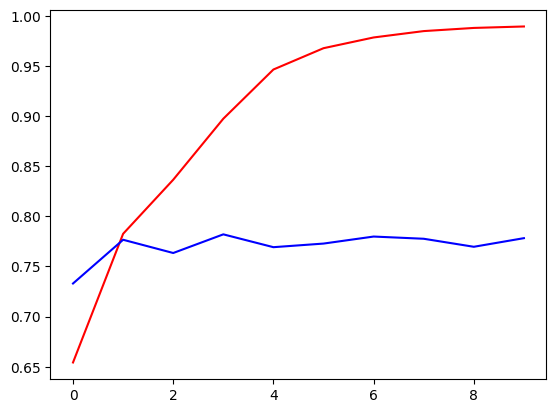

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

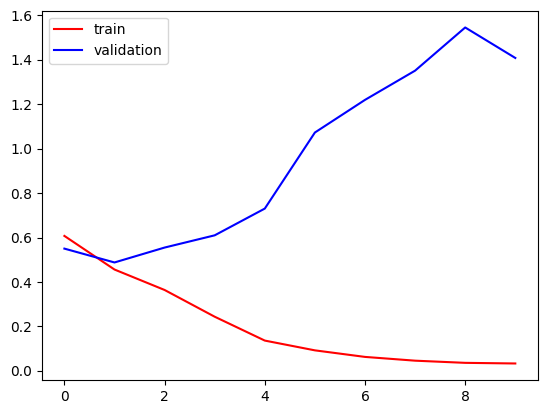

In [23]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [25]:
# ways to reduce overfitting
#* Add more data
#* Data Augmentation -> next video
#* L1/L2 Regularizer
#* Dropout
#* Batch Normalization
#* Reduce Complexity

**CNN network with Batch Normalization and Dropout layer**




In [27]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten, BatchNormalization, Dropout

In [28]:
# Create CNN model

model_2= Sequential()
model_2.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu',input_shape=(256,256,3)))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_2.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model_2.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model_2.add(Flatten())

model_2.add(Dense(128,activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(64,activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(1,activation='sigmoid'))

In [31]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [29]:
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history_2= model_2.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 115ms/step - loss: 1.2657 - accuracy: 0.6054 - val_loss: 0.6094 - val_accuracy: 0.6698
Epoch 2/10
625/625 [==============================] - 71s 112ms/step - loss: 0.5652 - accuracy: 0.7129 - val_loss: 0.4976 - val_accuracy: 0.7604
Epoch 3/10
625/625 [==============================] - 82s 131ms/step - loss: 0.4757 - accuracy: 0.7781 - val_loss: 0.4852 - val_accuracy: 0.7736
Epoch 4/10
625/625 [==============================] - 75s 120ms/step - loss: 0.4164 - accuracy: 0.8109 - val_loss: 0.4507 - val_accuracy: 0.7890
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3435 - accuracy: 0.8522 - val_loss: 0.6887 - val_accuracy: 0.7312
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.2789 - accuracy: 0.8823 - val_loss: 0.5076 - val_accuracy: 0.7656
Epoch 7/10
625/625 [==============================] - 67s 107ms/step - loss: 0.2084 - accuracy: 0.9144 - val_loss: 0.6078 - val_ac

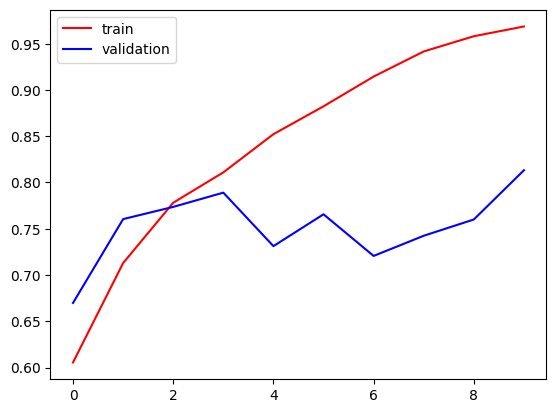

In [33]:
import matplotlib.pyplot as plt

plt.plot(history_2.history['accuracy'],color='red',label='train')
plt.plot(history_2.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

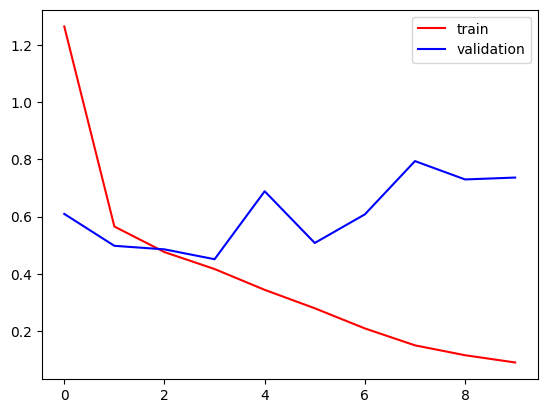

In [34]:
plt.plot(history_2.history['loss'],color='red',label='train')
plt.plot(history_2.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [35]:
import cv2
test_img=cv2.imread('/content/dg_1.jpg')

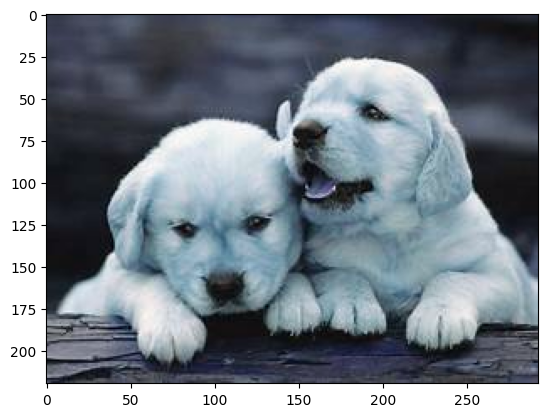

In [36]:
plt.imshow(test_img)

In [37]:
test_img.shape

(220, 293, 3)

In [38]:
test_img=cv2.resize(test_img,(256,256))

In [39]:
test_input=test_img.reshape((1,256,256,3))

In [40]:
model_2.predict(test_input)

1/1 [==============================] - 0s 402ms/step


array([[1.]], dtype=float32)

In [41]:
model.predict(test_input)

1/1 [==============================] - 0s 98ms/step


array([[1.]], dtype=float32)